In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as npdf 
df= pd.read_csv('heart_disease.csv')
df.head()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.replace(('Yes','No'),(1,0),inplace = True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [6]:
df.replace(('typical','asymptomatic','nonanginal','nontypical'),(1,2,3,4),inplace = True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,fixed,0
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,normal,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,reversable,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,normal,0
5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,reversable,1
300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,reversable,1
301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,reversable,1
302,57,0,4,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [8]:
df.replace(('fixed','normal','reversable'),(0,1,2),inplace = True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,0.0,0
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,1.0,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,2.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,2.0,1
300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,2.0,1
301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,2.0,1
302,57,0,4,130,236,0,2,174,0,0.0,2,1.0,1.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    float64
 13  AHD        303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.5 KB


In [10]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    int64  
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    float64
 13  AHD        297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [19]:
df.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.531987,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,1.326599,0.461279
std,9.049736,0.468500,0.858082,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.585061,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [12]:
df.isnull().sum()


Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [20]:
df['AHD'].value_counts()

0    160
1    137
Name: AHD, dtype: int64

In [22]:
x = df.iloc[:,:-1].values
x

array([[63.,  1.,  1., ...,  3.,  0.,  0.],
       [67.,  1.,  2., ...,  2.,  3.,  1.],
       [67.,  1.,  2., ...,  2.,  2.,  2.],
       ...,
       [68.,  1.,  2., ...,  2.,  2.,  2.],
       [57.,  1.,  2., ...,  2.,  1.,  2.],
       [57.,  0.,  4., ...,  2.,  1.,  1.]])

In [16]:
y = df.iloc[:,-1].values
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int6

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.40, random_state = 2)

In [25]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        61
           1       0.84      0.83      0.83        58

    accuracy                           0.84       119
   macro avg       0.84      0.84      0.84       119
weighted avg       0.84      0.84      0.84       119



<AxesSubplot:>

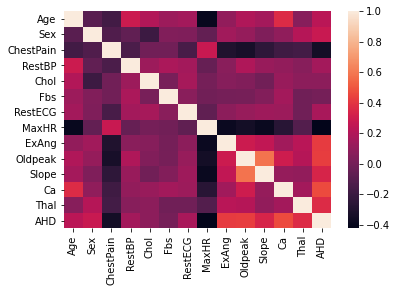

In [30]:
sns.heatmap(df.corr())


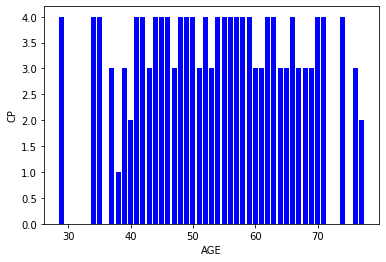

In [34]:
plt.bar("Age", "ChestPain", data = df, color = "blue")
plt.xlabel("AGE")
plt.ylabel("CP")
plt.show()

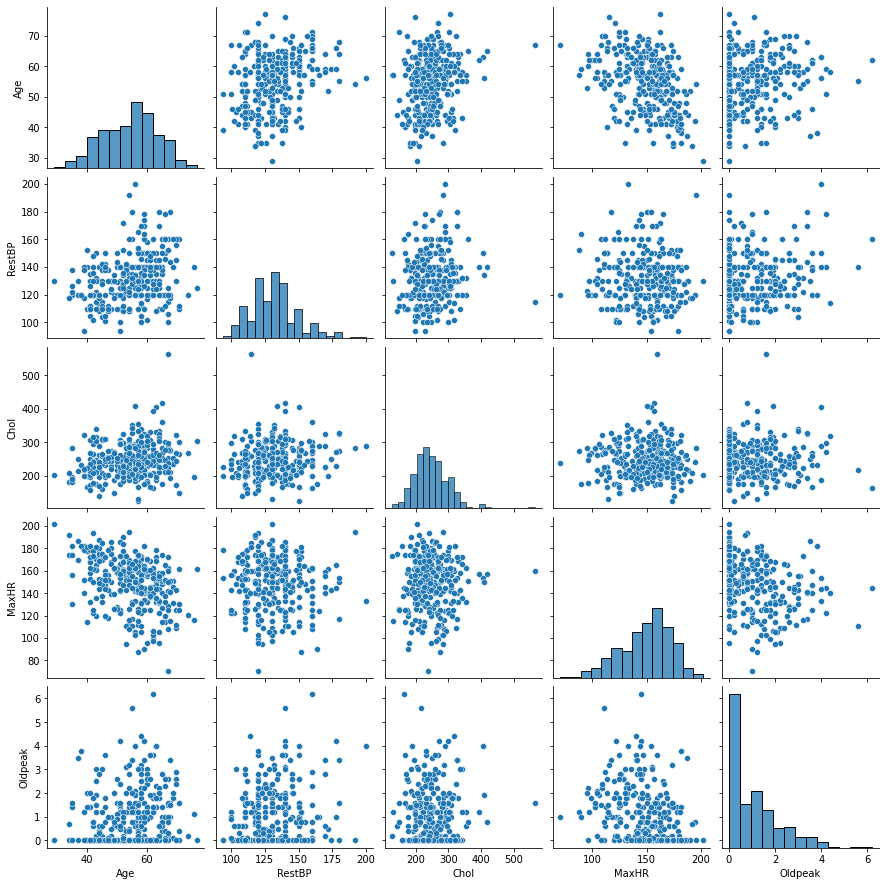

In [35]:
subData = df[['Age','RestBP','Chol','MaxHR','Oldpeak']]
sns.pairplot(subData)